Personal Dashboard - Rodrigo de Camargo Rodrigues

Choose a Non-Financial Data Source - Books

📚 Top 20 Books Scraped - Books to Scrape
Total Books Collected: 20
Most Expensive Book: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 (£57.25)
Cheapest Book: Starving Hearts (Triangular Trade Trilogy, #1) (£13.99)


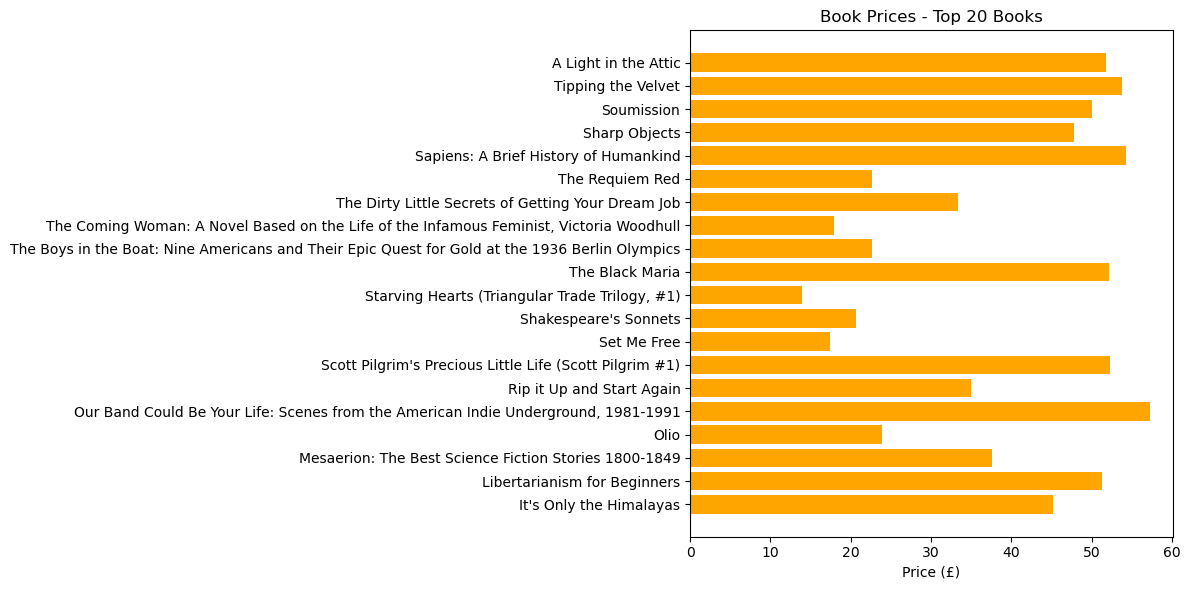


First 10 Books Collected:
                                                                                         Title  Price (£)
                                                                          A Light in the Attic      51.77
                                                                            Tipping the Velvet      53.74
                                                                                    Soumission      50.10
                                                                                 Sharp Objects      47.82
                                                         Sapiens: A Brief History of Humankind      54.23
                                                                               The Requiem Red      22.65
                                            The Dirty Little Secrets of Getting Your Dream Job      33.34
       The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull      17.93
The Boys in the Boa

In [20]:
# --- Dashboard: Top 20 Books (Corrected Encoding) ---

# 1. Import Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 2. Fetch and Parse Data
url = 'https://books.toscrape.com/catalogue/page-1.html'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Set the encoding properly
response.encoding = 'utf-8'

soup = BeautifulSoup(response.text, 'html.parser')

# 3. Extract Data
books = soup.find_all('article', class_='product_pod')

book_data = []

for book in books[:20]:  # Only first 20 books
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    
    # Clean the price string
    price = price.replace('£', '').replace('Â', '').strip()

    book_data.append({
        'Title': title,
        'Price (£)': float(price)
    })

# 4. Create DataFrame
df = pd.DataFrame(book_data)

# 5. Display Basic Information
print("="*60)
print("📚 Top 20 Books Scraped - Books to Scrape")
print("="*60)
print(f"Total Books Collected: {len(df)}")
print(f"Most Expensive Book: {df.loc[df['Price (£)'].idxmax(), 'Title']} (£{df['Price (£)'].max()})")
print(f"Cheapest Book: {df.loc[df['Price (£)'].idxmin(), 'Title']} (£{df['Price (£)'].min()})")
print("="*60)

# 6. Visualization - Prices
plt.figure(figsize=(12,6))
plt.barh(df['Title'], df['Price (£)'], color='orange')
plt.xlabel('Price (£)')
plt.title('Book Prices - Top 20 Books')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. Data Table Preview
print("\nFirst 10 Books Collected:")
print(df.head(10).to_string(index=False))

# 8. Save CSV
df.to_csv('top20_books.csv', index=False)
print("\n✅ CSV file 'top20_books.csv' saved!")

# 9. Ethical Note
print("\n🔗 Data Source: Books to Scrape (https://books.toscrape.com/)")
print("📚 Data collected for educational purposes only.")


